# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb)

Original code from https://github.com/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb

Import required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [ ]:
!wget https://raw.githubusercontent.com/itslouisgs/comp6639-linear-regression/main/tallest_buildings_global.csv

In [30]:
data = pd.read_csv("tallest_buildings_global.csv")
print(data.dtypes)
print("-----")
print(data.isna().values.any())

rank                     int64
name                    object
height_m               float64
height_ft                int64
year_built               int64
floors_above             int64
floors_below_ground    float64
city                    object
country                 object
dtype: object
-----
True


In [ ]:
print(data.info())
print("-----")
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 78 non-null     int64  
 1   name                 78 non-null     object 
 2   height_m             78 non-null     float64
 3   height_ft            78 non-null     int64  
 4   year_built           78 non-null     int64  
 5   floors_above         78 non-null     int64  
 6   floors_below_ground  67 non-null     float64
 7   city                 78 non-null     object 
 8   country              78 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 5.6+ KB
None
-----
            rank    height_m  ...  floors_above  floors_below_ground
count  78.000000   78.000000  ...     78.000000            67.000000
mean   39.500000  427.306410  ...     87.705128             4.000000
std    22.660538   84.193166  ...     17.793264             1.381699

Select particular column, and visualise the data (histogram)

                                   name  ...  floors_below_ground
0                          Burj Khalifa  ...                  1.0
1                           Merdeka 118  ...                  5.0
2                        Shanghai Tower  ...                  5.0
3             Abraj Al-Bait Clock Tower  ...                  3.0
4  Ping An International Finance Centre  ...                  5.0

[5 rows x 5 columns]


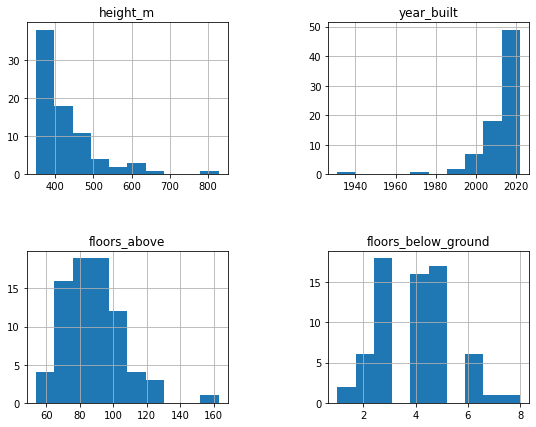

In [ ]:
newData = data[["name", "height_m", "year_built", "floors_above", "floors_below_ground"]]
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

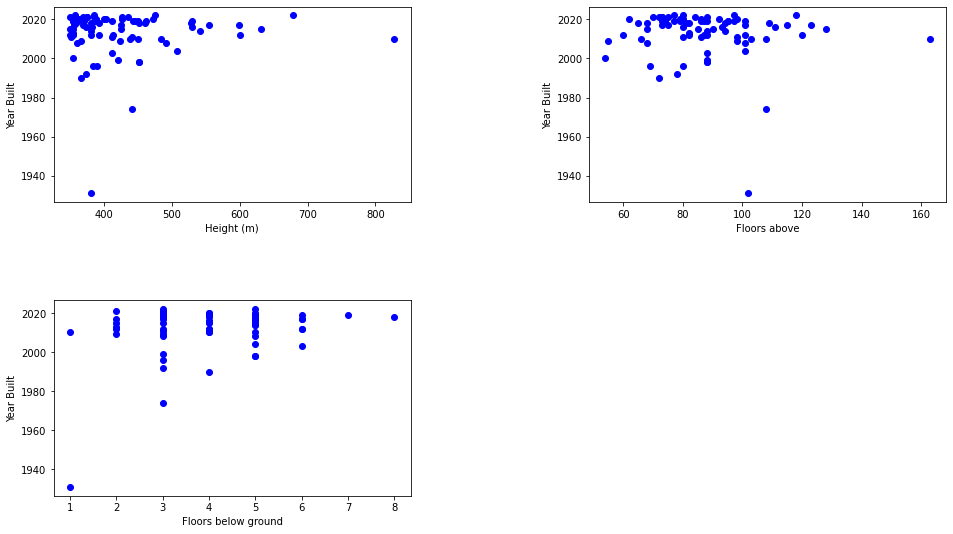

In [ ]:
plt.subplot(221)
plt.scatter(newData["height_m"], newData["year_built"], color="blue")
plt.xlabel("Height (m)")
plt.ylabel("Year Built")

plt.subplot(222)
plt.scatter(newData["floors_above"], newData["year_built"], color="blue")
plt.xlabel("Floors above")
plt.ylabel("Year Built")

plt.subplot(223)
plt.scatter(newData["floors_below_ground"], newData["year_built"], color="blue")
plt.xlabel("Floors below ground")
plt.ylabel("Year Built")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Height in m

In [ ]:
train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["height_m"]], train[["year_built"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.00295156]]
Intercept:  [2012.0569464]


Visualise the regression to the plot

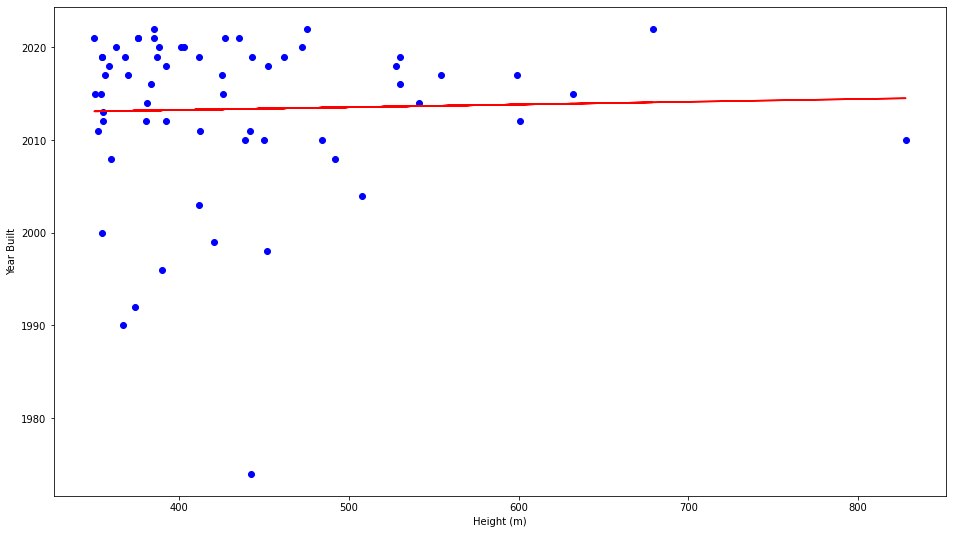

In [ ]:
plt.scatter(train["height_m"], train["year_built"],  color='blue')
plt.plot(train[["height_m"]], regression.coef_ * train[["height_m"]] + regression.intercept_, '-r')
plt.xlabel("Height (m)")
plt.ylabel("Year Built")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


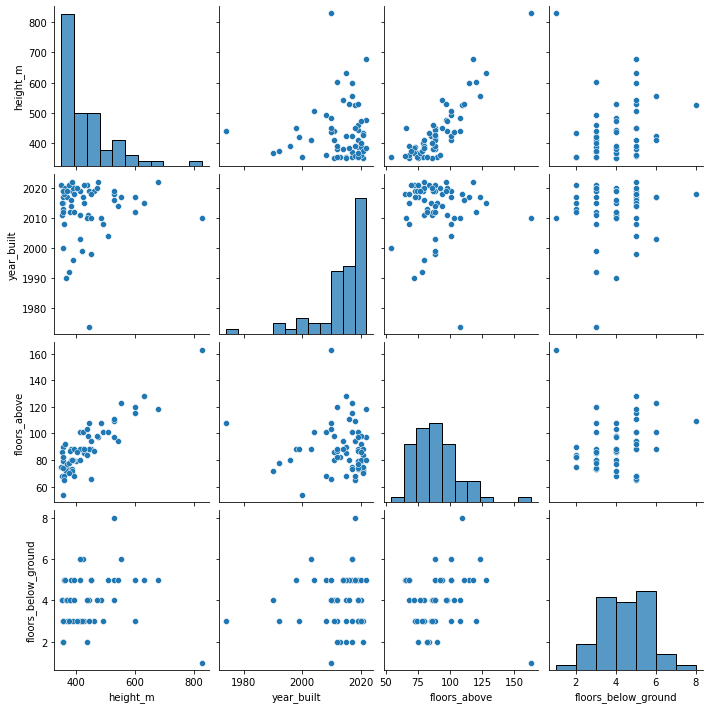

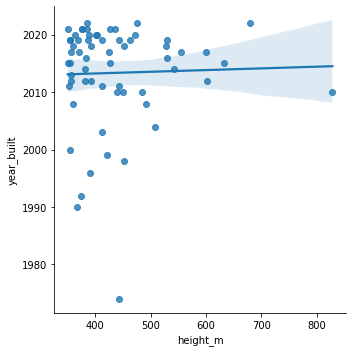

In [ ]:
sb.pairplot(train)
sb.lmplot("height_m", "year_built", data = train)
plt.show()

Predict new data & evaluate the model

In [ ]:
prediction = regression.predict(test[["height_m"]])
for i in range(len(test)):
  print(test[["height_m"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["year_built"]], prediction))
print("MSE : ", mean_squared_error(test[["year_built"]], prediction))
print("R2 : ", r2_score(test[["year_built"]], prediction))


[368.1] [2011.23366996]
[365.8] [2011.18509196]
[412.6] [2012.17354866]
[443.1] [2012.81773519]
[425.7] [2012.45023205]
[360.] [2011.06259091]
[438.6] [2012.72269127]
[387.1] [2011.63496648]
[451.9] [2013.00359884]
[358.] [2011.02034917]
[828.] [2020.94715795]
[384.] [2011.56949179]
[354.5] [2010.94642613]
[354.2] [2010.94008987]
[508.] [2014.18847963]
[445.5] [2012.86842527]
MAE :  7.1212973055022815
MSE :  69.55499814765372
R2 :  -0.21901003120417273
